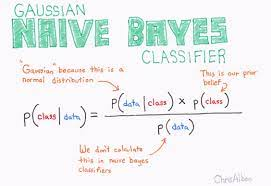

# **Projeto**

**Título:** Análise da probabilidade de distúrbio mental no trabalho com uso do classificador de Naive Bayes

**Objetivo:**

Este projeto tem como objetivo utilizar o classificador de Naive Bayes para prever a existência de colaboradores com potencial para adquirir doenças mentais, como também, realizar uma análise exploratória para identificar as principais características dos entrevistados por faixa etária, principalmente, o público Jovem, uma vez que estes estão no início de suas carreiras. Além disso, pretende-se entender como as empresas vem se comportando em relação a este tema. Pois, sabe-se que o quanto antes houver um pré-diagnóstico, ações mais assertivas podem ser tomadas para promover um ambiente de trabalho mais saudável.

**Dicionário dos Dados:**

|Atributo                 |     Dicionário                                    |
|-------------------------|---------------------------------------------------|
|Age                      | Idade                                             |
|Gender                   | Gênero                                            |
|Country                  | País                                              |
|state                    | Estado                                            | 
|self_employed            | Você trabalha por conta própria?                  |
|family_history           | Você tem histórico familiar de doença mental?     |
|treatment                | Você procurou tratamento para um problema de saúde mental?                                                                       |
|work_interfere           | Se você tem um problema de saúde mental, acha que         isso interfere no seu trabalho?                                    |
|no_employees             | Quantos funcionários sua empresa ou organização possui?                                                                       |
|remote_work              | Você trabalha remotamente (fora do escritório) pelo menos 50% do tempo?                                                           |
|tech_company             | O seu empregador é principalmente uma empresa / organização de tecnologia?                                                    |
|benefits                 | O seu empregador oferece benefícios para a saúde mental?                                                                       |
|care_options             | Você conhece as opções de cuidados de saúde mental que seu empregador oferece?                                                   |
|wellness_program         | Seu empregador já discutiu saúde mental como parte de um programa de bem-estar de funcionários?                                  |
|seek_help                | Seu empregador fornece recursos para aprender mais sobre   questões de saúde mental e como procurar ajuda?                       | 
|anonymity                | O seu anonimato é protegido se você optar por tirar proveito dos recursos de tratamento de saúde mental ou abuso de substâncias?  |
|leave                    | É fácil para você tirar uma licença médica por um problema de saúde mental?                                                     |
|mental_health_consequence| Você acha que discutir um problema de saúde mental com seu empregador teria consequências negativas?                             |
|phys_health_consequence  | Você acha que discutir um problema de saúde física com seu empregador teria consequências negativas?                             |
|coworkers                | Você estaria disposto a discutir um problema de   saúde mental com seus colegas de trabalho?                                    |
|supervisor               | Você estaria disposto a discutir um problema de saúde mental com seu (s) supervisor (es) direto (s)?                          |
|mental_health_interview  | Você mencionaria um problema de saúde mental com um potencial empregador em uma entrevista?                                       |
|phys_health_interview    | Você mencionaria um problema de saúde física com um potencial empregador em uma entrevista?                                       |
|mental_vs_physical       | Você acha que seu empregador leva a saúde mental  tão a sério quanto a saúde física?                                            |
|obs_consequence          | Você já ouviu falar ou observou consequências negativas para colegas de trabalho com problemas de saúde mental no seu local de trabalho?                                                                  |

**1. Importando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as ws
ws.filterwarnings("ignore")
import os
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score #acuracia
from sklearn.metrics import precision_score #precision
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [2]:
#Estilo dos gráficos
plt.style.use('seaborn-bright')
#Padronizando o tamanho dos gráficos 
plt.rcParams['figure.figsize'] = (5,4)
%matplotlib inline

**2. Lendo o Dataset**

In [3]:
saude = pd.read_csv('saude_mental_analise_exploratoria.csv')

**3. Visão Geral do Dataframe**

3.1 Visualizando as 05 primeiras linhas do Dataframe.

In [4]:
saude.head()

,Age,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,faixa_etaria
0,37,No,Yes,Often,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,2014,Adulto
1,44,No,No,Rarely,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,2014,Adulto
2,32,No,No,Rarely,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,2014,Adulto
3,31,Yes,Yes,Often,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,2014,Adulto
4,31,No,No,Never,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,2014,Adulto


3.2 Visualizando o número de entradas e atributos.

In [5]:
saude.shape

(1251, 22)

3.3 Visualizando as informaões do Dataframe

In [6]:
saude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1251 non-null   int64 
 1   family_history             1251 non-null   object
 2   treatment                  1251 non-null   object
 3   work_interfere             1251 non-null   object
 4   remote_work                1251 non-null   object
 5   tech_company               1251 non-null   object
 6   benefits                   1251 non-null   object
 7   care_options               1251 non-null   object
 8   wellness_program           1251 non-null   object
 9   seek_help                  1251 non-null   object
 10  anonymity                  1251 non-null   object
 11  leave                      1251 non-null   object
 12  mental_health_consequence  1251 non-null   object
 13  phys_health_consequence    1251 non-null   object
 14  coworker

3.4 Visualizando os atribtuos categóricos

In [7]:
# Buscando variáveis categóricas

categorical = [var for var in saude.columns if saude[var].dtype=='O']

print('Existem {} variáveis categóricas\n'.format(len(categorical)))

print('As variáveis são :\n\n', categorical)

Existem 20 variáveis categóricas

As variáveis são :

 ['family_history', 'treatment', 'work_interfere', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'faixa_etaria']


**4. Tratamento e Enriquecimento dos dados**

4.1 Codificação das freatures categóricas

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
saude_tratamento = saude.apply(LabelEncoder().fit_transform)


**5. Explorando os dados**

5.1 Visualizando as classes da variável alvo.

In [10]:
buscou_tratamento = len(saude_tratamento[saude_tratamento.treatment == 1]) 
Naobuscou_tratamento = len(saude_tratamento[saude_tratamento.treatment == 0])
print('Recorreu a tratamento: {}'.format(buscou_tratamento))
print('Não recorreu a tratamento: {}'.format(Naobuscou_tratamento))

Recorreu a tratamento: 632
Não recorreu a tratamento: 619


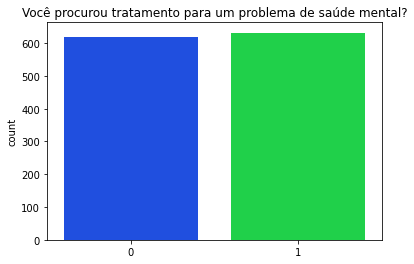

In [11]:
sns.countplot(saude_tratamento.treatment)
plt.title('Você procurou tratamento para um problema de saúde mental?')
plt.xlabel('')
plt.show()

5.2 Análise da Idade dos colaboradores que recorreram a Tratamento de saúde mental.

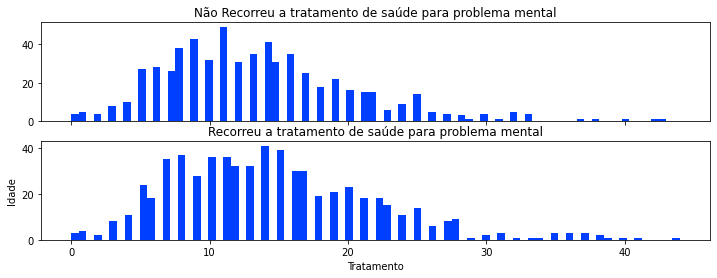

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 80

ax1.hist(saude_tratamento.Age[saude_tratamento.treatment == 0], bins = bins)
ax1.set_title('Não Recorreu a tratamento de saúde para problema mental')

ax2.hist(saude_tratamento.Age[saude_tratamento.treatment == 1], bins = bins)
ax2.set_title('Recorreu a tratamento de saúde para problema mental')

plt.xlabel('Tratamento')
plt.ylabel('Idade')
plt.show()

**6. Implementação do Classificador de Naive Bayes**

In [13]:
#Dropando os atributos não característicos
X = saude_tratamento.drop(['treatment'], axis=1)
#Selecionando apenas a variável alvo
y = saude_tratamento['treatment']

In [14]:
#Separando os dados de treinamento e teste
X_treino, x_teste, y_treino, y_teste = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=42, stratify=y)

In [15]:
X_treino.shape, x_teste.shape

((1000, 21), (251, 21))

In [16]:
#Instanciando o modelo Bayseano
risco_saude = BernoulliNB()

In [17]:
#Treinando o modelo
risco_saude.fit(X_treino, y_treino)

BernoulliNB()

In [18]:
#Testando o modelo
previsao = risco_saude.predict(x_teste)

In [19]:
#Calculando o desempenho
total_teste = x_teste.shape[0]
total_acertos = (y_teste == previsao).sum()
desempenho = (total_acertos / total_teste ) * 100
print('Total de casos de testes {}, com {} acertos e com desempenho {:05.2f}%'.format(total_teste, total_acertos, desempenho))


Total de casos de testes 251, com 188 acertos e com desempenho 74.90%


**7. Análise do Desempenho do Classificador de Naive Bayes**

7.1 Análise da Acurácia do modelo

In [20]:
print('Acurácia: {0:0.4f}'. format(accuracy_score(y_teste, previsao)))

Acurácia: 0.7490


A acurácia avalia a aplicabilidade do seu modelo, isto significa, que é possível mensurar o desempenho do modelo com uso do valor da acurácia, o quanto mais próximo de 100% melhor o resultado do modelo.

Observe que a acurácia analisa os valores dos rótulos de classe verdadeiros com os rótulos de classe previstos no conjunto de teste.

7.2 Comparando a precisão do conjunto de treinamento e do conjunto de teste

In [21]:
y_visao_treinameto = risco_saude.predict(X_treino)

In [22]:
# Visualizando a Acurácia do Treinamento e Teste
print('Acurária do Treinamento: {:.4f}'.format(risco_saude.score(X_treino, y_treino)))
print('Acurácia do Teste: {:.4f}'.format(risco_saude.score(x_teste, y_teste)))

Acurária do Treinamento: 0.7120
Acurácia do Teste: 0.7490


Observa-se que os valores da acurácia de treinamento e teste sofreram uma alteração, no entanto, a diferença não indica um sobreajuste de resultado, para ter certeza faremos a análise de precisão nula logo abaixo.

7.3 Análise da precisão Nula para verificar a eficácia do modelo.

A análise da precisão nula pode ser alcançada sempre prevendo a classe mais frequente. Logo, vamos, primeiramente, verificar a distribuição da classe no conjunto de teste.

In [23]:
y_teste.value_counts()

1    127
0    124
Name: treatment, dtype: int64

Podemos ver que a ocorrência da classe mais frequente é de 190. Portanto, podemos calcular a precisão nula dividindo 190 pelo número total de ocorrências.

In [24]:
#Cálculo da precisão nula
#Dividi-se a soma do valor de maior ocorrência com o número total de ocorrências
precisao_nula = (127 / (127 + 124))

In [25]:
print ('Pontuação de precisão nula: {0: 0.4f}'. format(precisao_nula))

Pontuação de precisão nula:  0.5060


Nosso modelo apresenta uma acurácia de 0.7314, e a pontução da precisão nula é 0.5053. Dessa forma, nosso modelo de classificação de Naive Bayes está apresentando um bom desempenho.

7.4 Análise da Matriz de Confusão

Utilizaremos a matriz de confusão como ferramenta para interpretar a eficácia do modelo de classificação de Naive Bayes. Este recurso permitirá que tenhamos uma visão mais transparente dos possíveis erros produzidos e do desempenho do modelo de classificação. 

**Visão geral da Matrix de Confusão:**

Resultados apresentados:

**Os verdadeiros positivos (TP)** **-** os verdadeiros positivos ocorrem quando predizemos que uma observação pertence a uma determinada classe e a observação realmente pertence a essa classe.

**Negativos verdadeiros (TN) -** Os negativos verdadeiros ocorrem quando predizemos que uma observação não pertence a uma determinada classe e a observação na verdade não pertence a essa classe.

**Falsos positivos (FP) -** Falsos positivos ocorrem quando predizemos que uma observação pertence a uma determinada classe, mas a observação na verdade não pertence a essa classe. Este tipo de erro é denominado erro Tipo I.

**Falsos negativos (FN) -** Falsos negativos ocorrem quando prevemos que uma observação não pertence a uma determinada classe, mas a observação realmente pertence a essa classe. Este é um erro muito sério e é denominado erro Tipo II.

Esses quatro resultados são resumidos em uma matriz de confusão fornecida abaixo.

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_teste, previsao)

print('#### Matrix de Confusão ####')
print('\nVerdadeiro Positivo(TP) = ', cm[0,0])
print('\nVerdadeiro Negatives(TN) = ', cm[1,1])
print('\nFalso Positivo(FP) = ', cm[0,1])
print('\nFalso Negativo(FN) = ', cm[1,0])

#### Matrix de Confusão ####

Verdadeiro Positivo(TP) =  97

Verdadeiro Negatives(TN) =  91

Falso Positivo(FP) =  27

Falso Negativo(FN) =  36


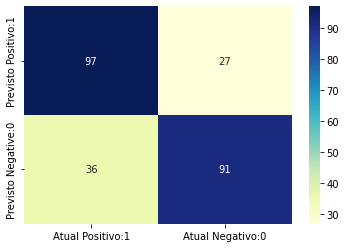

In [27]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Atual Positivo:1', 'Atual Negativo:0'], 
                                 index=['Previsto Positivo:1', 'Previsto Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

A Matrix de Confusão nos mostra uma ideia geral do desempenho do classificador, no entanto, precisamos verificar outras métricas para avaliar se nosso modelo, realmente, está cumprido com o esperado ou se está apresentando ineficácia nos resultados. Vamos recorrer ao relatório de classificão que exibe as pontuações de precisão, recall, f1 e suporte para o modelo.

7.5 Classificação métrica do classificador

7.5.1 Relatório de Classificação

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, previsao))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       124
           1       0.77      0.72      0.74       127

    accuracy                           0.75       251
   macro avg       0.75      0.75      0.75       251
weighted avg       0.75      0.75      0.75       251



7.5.1.1 Classificaão da Acurácia

In [29]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [30]:
# Visualizando a classificação da Acurácia
classificacao_acuracia = (TP + TN) / float(TP + TN + FP + FN)
print('Classificação da Acurácia: {0:0.4f}'.format(classificacao_acuracia))

Classificação da Acurácia: 0.7490


7.5.1.2 Classificação do Erro

In [31]:
# Visualizando a classificaão do erro
classificacao_erro = (FP + FN) / float(TP + TN + FP + FN)
print('Classificação do erro: {0:0.4f}'.format(classificacao_erro))

Classificação do erro: 0.2510


7.5.1.3 Classificação da Precisão

A precisão pode ser definida como a porcentagem de resultados positivos previstos corretamente entre todos os resultados positivos previstos. A precisão identifica a proporção de resultados positivos previstos corretamente. Ele está mais preocupado com a classe positiva do que com a classe negativa.

A tabela de classificação de Precisão é o cálculo dos acertos do nosso modelo.

In [32]:
# Visualizando da pontuação da Precisão
pontuacao_precisao = TP / float(TP + FP)
print('Precisão: {0:0.4f}'.format(pontuacao_precisao))

Precisão: 0.7823


7.5.1.4 Recall

Essa métrica exibe a proporção de positivos reais previstos corretamente, calculando a divisão do valor dos verdadeiros positivos(TP) pela soma de verdadeiros positivos e falsos negativos (TP + FN). Essa métrica também é conhecida por sensibilidade.

Recall identifica a proporção de positivos reais previstos corretamente.

In [33]:
recall = TP / float(TP + FN)
print('Recall ou Sensibilidade: {0:0.4f}'.format(recall))

Recall ou Sensibilidade: 0.7293


Taxa de verdadeiro positivo a taxa positiva verdadeira é sinônimo de recall.

In [34]:
avaliar_verdadeiro_positivo = TP / float(TP + FN)
print('Taxa de verdadeiro Positivo: {0:0.4f}'.format(avaliar_verdadeiro_positivo))

Taxa de verdadeiro Positivo: 0.7293


Taxa de Falso positivo

In [35]:
taxa_falso_positivo = FP / float(FP + TN)
print('Taxa de Falso Positivo: {0:0.4f}'.format(taxa_falso_positivo))

Taxa de Falso Positivo: 0.2288


7.5.1.5 Especificity

In [36]:
specificity = TN / (TN + FP)
print('Specificity: {0:0.4f}'.format(specificity))

Specificity: 0.7712


7.5.1.6 F1-Score

Essa média exibe  a média harmônica ponderada de precisão e recall. A melhor pontuação dessa métrica seria 1,0 e o pior seria 0,0. pontuação f1 é a média harmônica de precisão e recall. Portanto, f1-score é sempre inferior às medidas de precisão, pois incorporam precisão e recall em seus cálculos. A média ponderada da pontuação f1 deve ser usada para comparar os modelos do classificador, não a precisão global.

In [37]:
from sklearn.metrics import f1_score #f1-score
f1 = f1_score(y_teste, previsao)
print('F1-Score: %f' % f1)

F1-Score: 0.742857


7.6 Calculando a probabilidade do resultado da previsão.

In [38]:
probabilidade_previsao = risco_saude.predict_proba(x_teste)[0:10]

probabilidade_previsao

array([[0.49673396, 0.50326604],
       [0.39314146, 0.60685854],
       [0.33743556, 0.66256444],
       [0.12603824, 0.87396176],
       [0.8180859 , 0.1819141 ],
       [0.45500598, 0.54499402],
       [0.95657462, 0.04342538],
       [0.94015237, 0.05984763],
       [0.90548193, 0.09451807],
       [0.59112932, 0.40887068]])

In [39]:
for i in range(len(probabilidade_previsao)):
  df_prob_previsao = pd.DataFrame(data=np.float_(probabilidade_previsao[0:,0:]), columns=['Nao_Possui_Problema_Mental','Possui_Problema_Mental'])

In [40]:
print('##########   Tabela de Probabilidade   ##########')
print(df_prob_previsao.to_string())

##########   Tabela de Probabilidade   ##########
   Nao_Possui_Problema_Mental  Possui_Problema_Mental
0                    0.496734                0.503266
1                    0.393141                0.606859
2                    0.337436                0.662564
3                    0.126038                0.873962
4                    0.818086                0.181914
5                    0.455006                0.544994
6                    0.956575                0.043425
7                    0.940152                0.059848
8                    0.905482                0.094518
9                    0.591129                0.408871


Visualiando a média das previsões para cada classe.

In [41]:
df_prob_previsao.mean()

Nao_Possui_Problema_Mental    0.601978
Possui_Problema_Mental        0.398022
dtype: float64

In [42]:
# Visualizar as probabilidade de 10 precisões de Possuir Problema Mental
risco_saude.predict_proba(x_teste)[0:10, 1]

array([0.50326604, 0.60685854, 0.66256444, 0.87396176, 0.1819141 ,
       0.54499402, 0.04342538, 0.05984763, 0.09451807, 0.40887068])

In [43]:
prev_prob = risco_saude.predict_proba(x_teste)[:, 1]

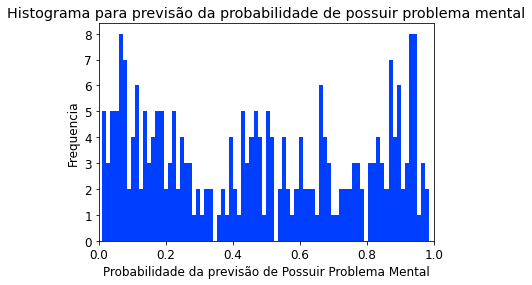

In [44]:
# plot histograma para a probabilidade das 10 previsões
# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histograma com 10 bins
plt.hist(prev_prob, bins = 80)

# set the x-axis limit
plt.xlim(0,1)


plt.title('Histograma para previsão da probabilidade de possuir problema mental')

plt.xlabel('Probabilidade da previsão de Possuir Problema Mental')
plt.ylabel('Frequencia')
plt.show()

7.7 Validação cruzada k-Fold

In [48]:
# Aplicando validação Cruzada - K-Fold

from sklearn.model_selection import cross_val_score

pont_kfold = cross_val_score(risco_saude, X_treino, y_treino, cv = 10, scoring='accuracy')

print('Pontuação Validação Cruzada:{}'.format(pont_kfold))

Pontuação Validação Cruzada:[0.66 0.69 0.75 0.72 0.73 0.7  0.71 0.7  0.72 0.72]


In [49]:
#Pontuação média de validação cruzada

print('Pontuação média de validação cruzada: {:.4f}'.format(pont_kfold.mean()))

Pontuação média de validação cruzada: 0.7100


**Interpretação**

Usando a validação cruzada média, podemos concluir que esperamos que o modelo tenha cerca de 71% de precisão em média.

Se observarmos todas as 10 pontuações produzidas pela validação cruzada de 10 vezes, também podemos concluir que há uma variação relativamente pequena na precisão entre as dobras, variando de 75% de precisão a 65% de precisão. Assim, podemos concluir que o modelo é independente das dobras particulares usadas para o treinamento.

A precisão do nosso modelo original é 0,7490, mas a precisão média da validação cruzada é 71%. Portanto, a precisão da validação cruzada de 10 vezes não resulta em melhoria de desempenho para este modelo.

CURVA ROC UAC

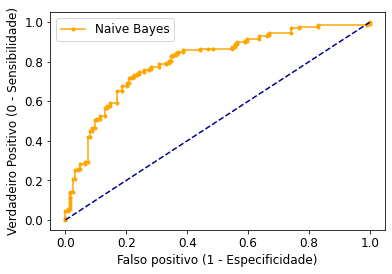

In [45]:
# Gráfico da curva roc
rfp, rvp,lim = roc_curve(y_teste, prev_prob)
plt.plot(rfp, rvp, marker='.',label='Naive Bayes', color="orange")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('Falso positivo (1 - Especificidade)')
plt.ylabel('Verdadeiro Positivo (0 - Sensibilidade)')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()

A curva ROC nos ajuda a escolher um nível de limite que equilibra a sensibilidade e a especificidade para um determinado contexto.

ROC AUC
ROC AUC significa Receiver Operating Characteristic - Area Under Curve. É uma técnica para comparar o desempenho do classificador. Nesta técnica, medimos a área sob a curva (AUC). Um classificador perfeito terá um ROC AUC igual a 1, enquanto um classificador puramente aleatório terá um ROC AUC igual a 0,5.

Portanto, ROC AUC é a porcentagem do gráfico ROC que está abaixo da curva.

In [46]:
ROC_AUC = roc_auc_score(y_teste, prev_prob)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8022


Interpretação
O ROC AUC é um resumo de número único do desempenho do classificador. Quanto maior o valor, melhor é o classificador.

ROC AUC de nosso modelo está acima de 80%. Podemos concluir que nosso classificador faz um bom trabalho em prever se um colaborador possui ou não problema de saúde mental.

In [51]:
#calcular ROC AUC com validação cruzada
Cross_validated_ROC_AUC = cross_val_score(risco_saude, X_treino, y_treino, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.7720


Vamos verificar a precisão da validação cruzada calculando sua média.